In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/penguins.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


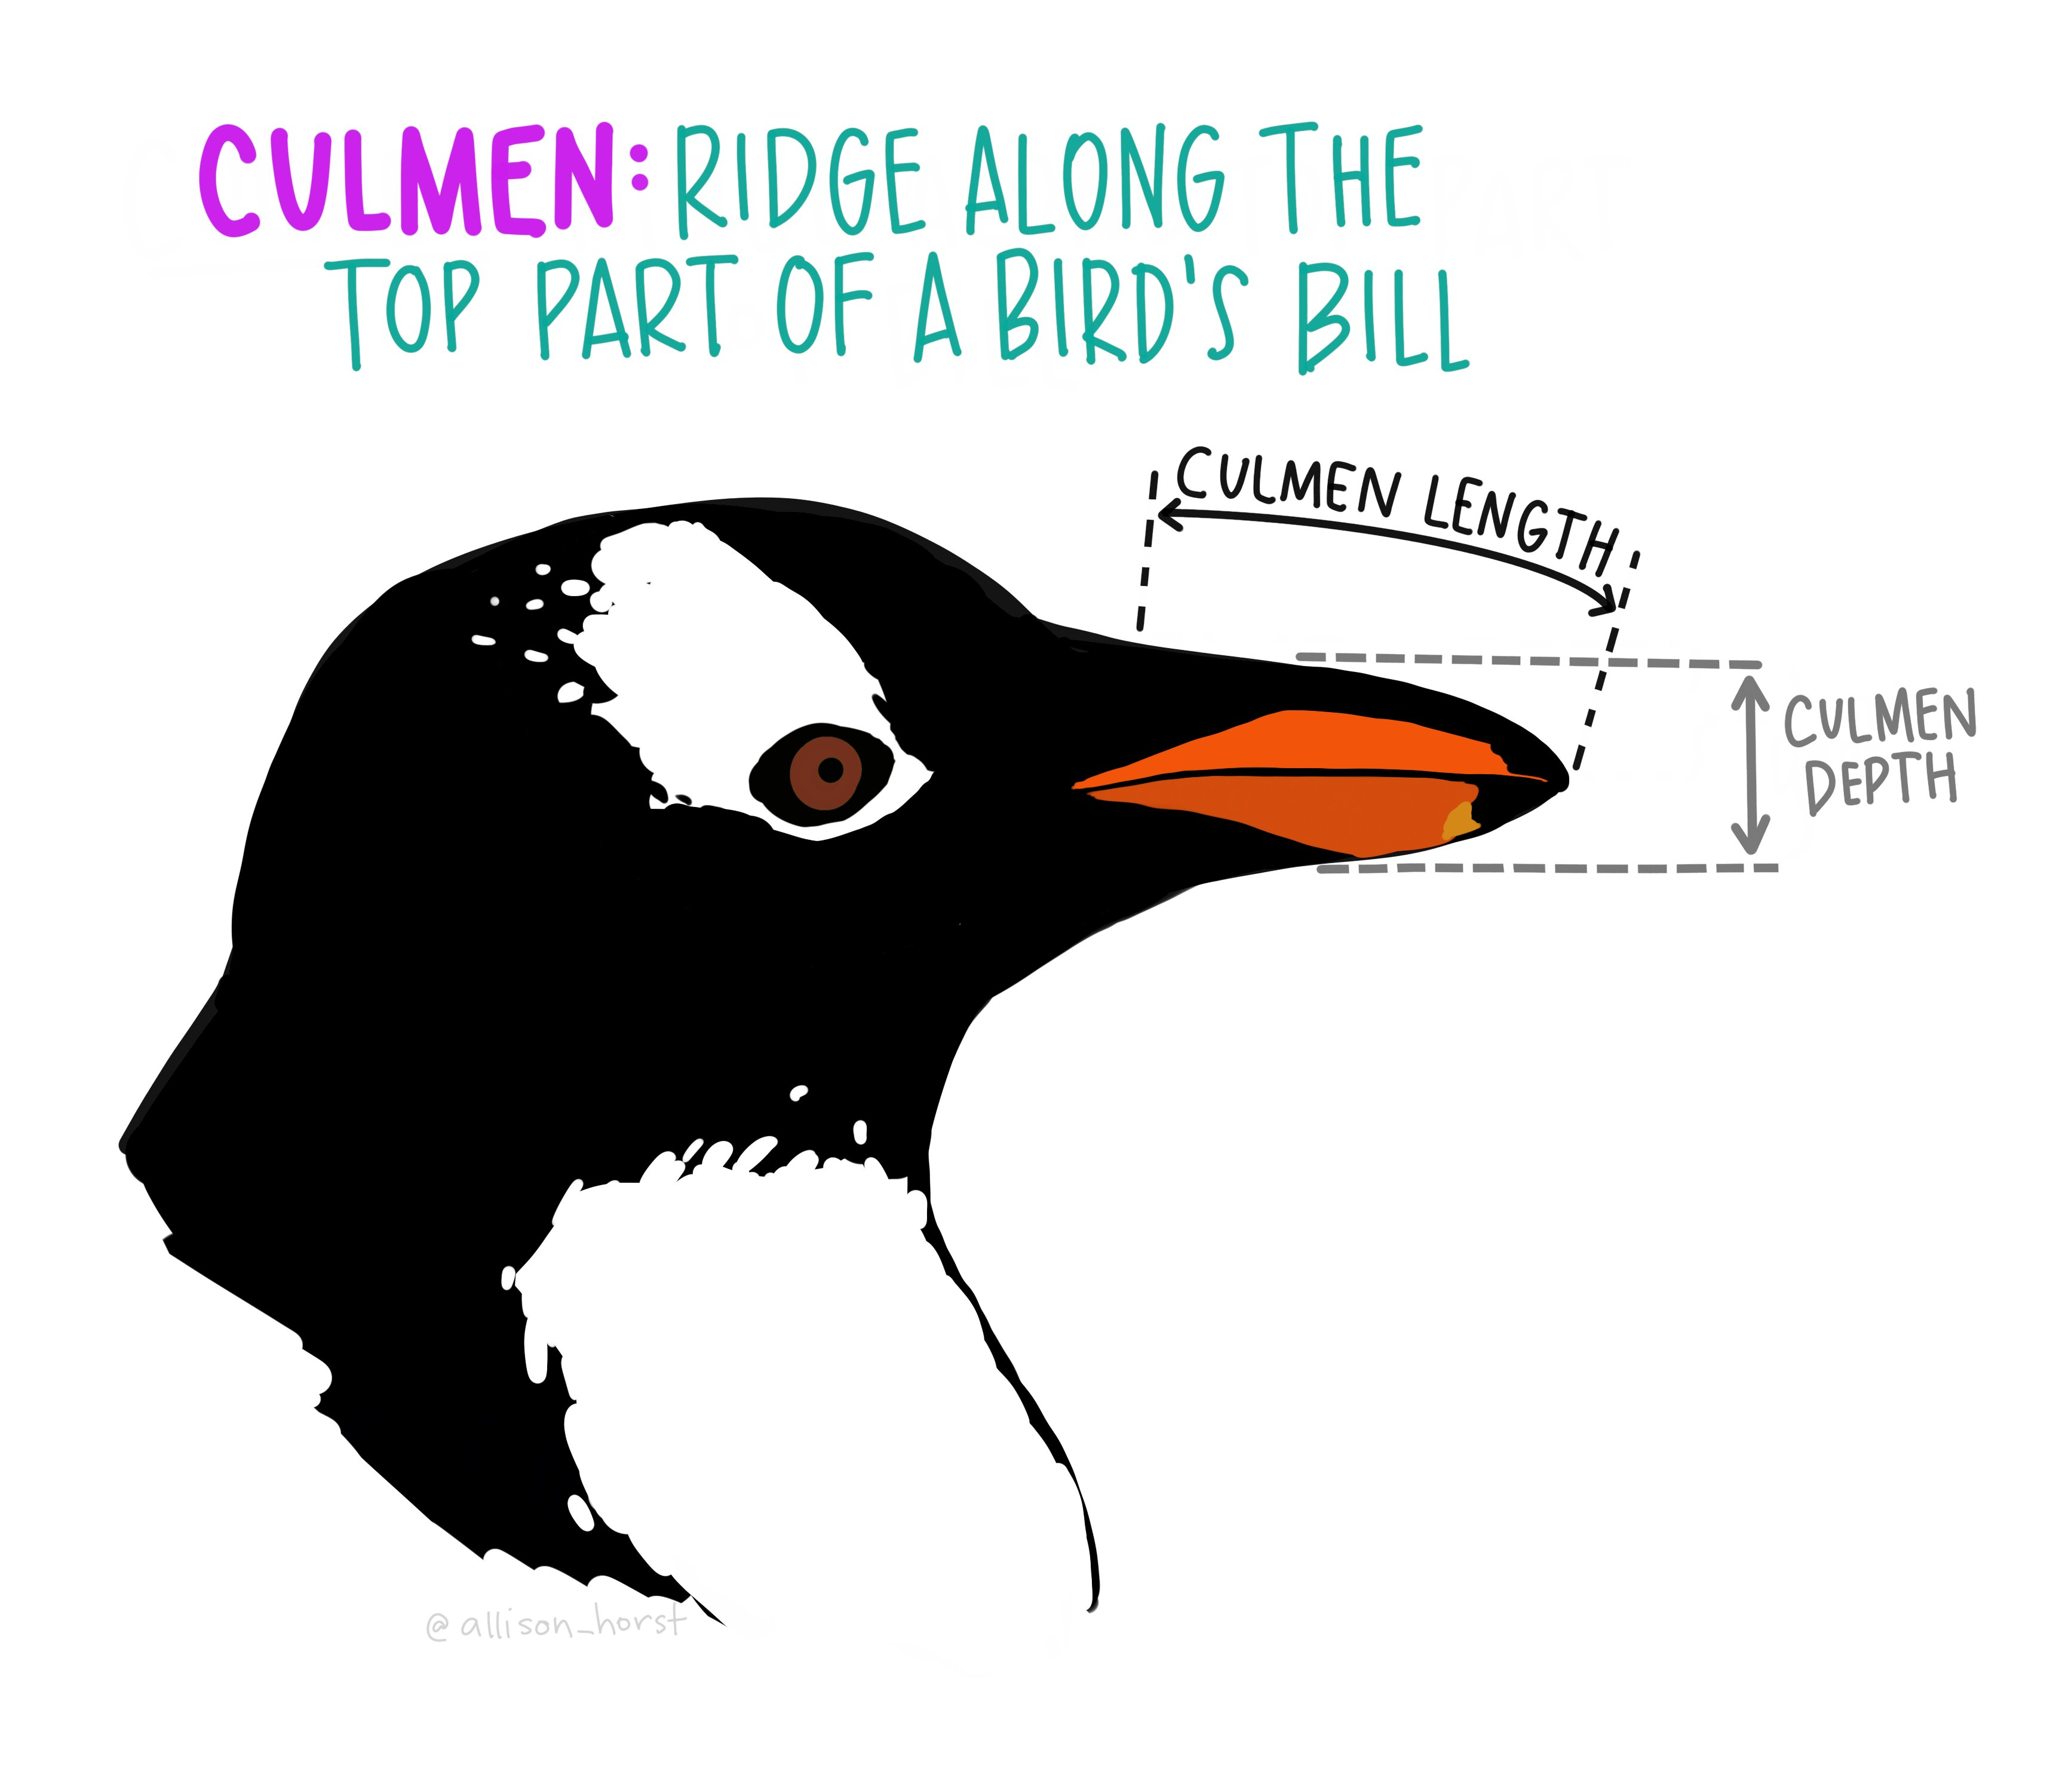

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Transformando a variável sex
# Mapeamento de valores
mapeamento = {'MALE': 0, 'FEMALE': 1}

# Aplicar o mapeamento à coluna
df['sex1'] = df['sex'].map(mapeamento)

# Exibição do DataFrame com a nova coluna numérica
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0


In [ ]:
# Transformando a variável sex
# Mapeamento de valores
mapeamento1 = {'Adelie': 1, 'Chinstrap': 2,'Gentoo':3}

# Aplicar o mapeamento à coluna
df['species1'] = df['species'].map(mapeamento1)

# Exibição do DataFrame com a nova coluna numérica
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1,species1
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0,1


In [ ]:
# Calcular o "IMC" e criar a coluna correspondente
for d in df:
    df['IMC'] = df['body_mass_g'] / (df['flipper_length_mm'] ** 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
 7   sex1               333 non-null    float64
 8   species1           344 non-null    int64  
 9   IMC                342 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 27.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.100000,39.225000,44.450000,48.500000,59.600000
culmen_depth_mm,342.0,17.151170,1.974793,13.100000,15.600000,17.300000,18.700000,21.500000
flipper_length_mm,342.0,200.915205,14.061714,172.000000,190.000000,197.000000,213.000000,231.000000
body_mass_g,342.0,4201.754386,801.954536,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
sex1,333.0,0.495495,0.500732,0.000000,0.000000,0.000000,1.000000,1.000000
species1,344.0,1.918605,0.893320,1.000000,1.000000,2.000000,3.000000,3.000000
IMC,342.0,0.103252,0.010164,0.073242,0.095799,0.102699,0.109857,0.137346


In [ ]:
len(df)

344

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
sex1                 11
species1              0
IMC                   2
dtype: int64

# **DF sem NAs**

In [ ]:
df1 = df.dropna(inplace=False)

In [ ]:
total = df1.isnull().sum().sort_values(ascending=False)
percent_1 = df1.isnull().sum()/df1.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
species,0,0.0
island,0,0.0
culmen_length_mm,0,0.0
culmen_depth_mm,0,0.0
flipper_length_mm,0,0.0
body_mass_g,0,0.0
sex,0,0.0
sex1,0,0.0
species1,0,0.0
IMC,0,0.0


In [ ]:
df1['sex1']=df1['sex1'].astype(int) # Convertendo em um valor

<ipython-input-51-d8651b889643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex1']=df1['sex1'].astype(int) # Convertendo em um valor


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.100000,39.500000,44.500000,48.600000,59.600000
culmen_depth_mm,333.0,17.164865,1.969235,13.100000,15.600000,17.300000,18.700000,21.500000
flipper_length_mm,333.0,200.966967,14.015765,172.000000,190.000000,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057057,805.215802,2700.000000,3550.000000,4050.000000,4775.000000,6300.000000
sex1,333.0,0.495495,0.500732,0.000000,0.000000,0.000000,1.000000,1.000000
species1,333.0,1.918919,0.889718,1.000000,1.000000,2.000000,3.000000,3.000000
IMC,333.0,0.103317,0.010176,0.073242,0.095983,0.102857,0.109863,0.137346


In [ ]:
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1,species1,IMC
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1,0.114465
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,1,0.109839
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,1,0.085470
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,1,0.092620
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1,0.101108
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,1,3,0.107542
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1,3,0.104922
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0,3,0.116671
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1,3,0.115700


<Axes: xlabel='species', ylabel='culmen_length_mm'>

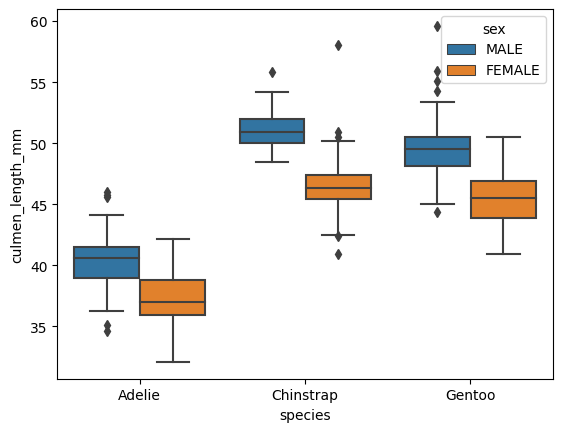

In [ ]:
sns.boxplot(x = df1['species'],
            y = df1['culmen_length_mm'],
            hue = df1['sex'])

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

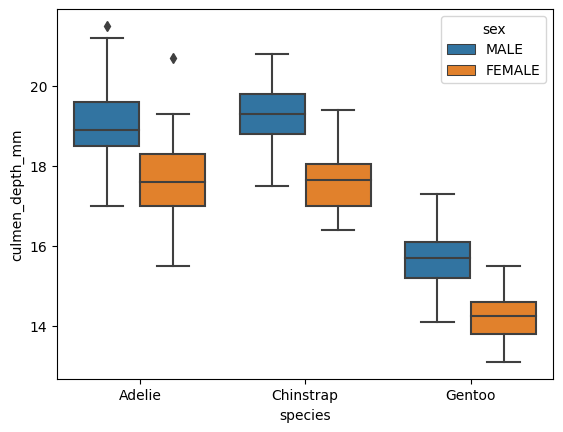

In [ ]:
sns.boxplot(x = df1['species'],
            y = df1['culmen_depth_mm'],
            hue = df1['sex'])

<Axes: xlabel='species', ylabel='flipper_length_mm'>

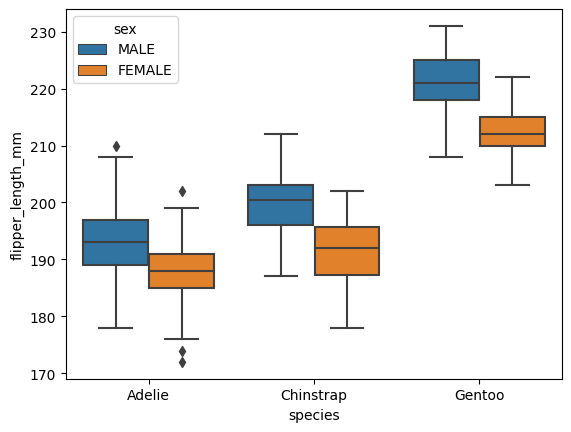

In [ ]:
sns.boxplot(x = df1['species'],
            y = df1['flipper_length_mm'],
            hue = df1['sex'])

<Axes: xlabel='species', ylabel='body_mass_g'>

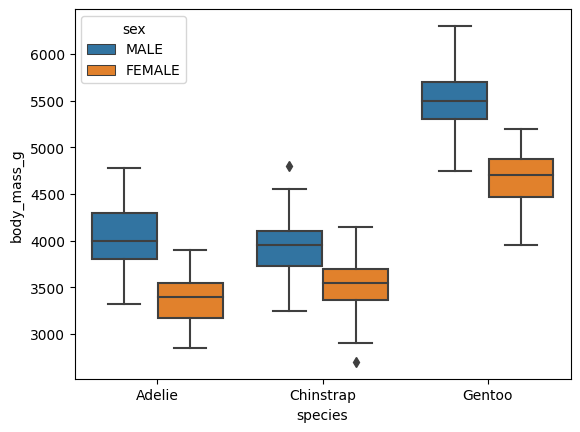

In [ ]:
sns.boxplot(x = df1['species'],
            y = df1['body_mass_g'],
            hue = df1['sex'])

In [ ]:
df1.columns.values

array(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'sex1', 'species1',
       'IMC'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

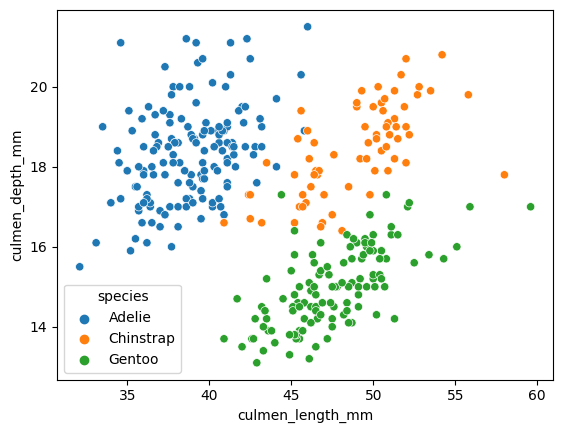

In [ ]:
sns.scatterplot(data=df1, x="culmen_length_mm", y="culmen_depth_mm", hue="species")

***Aqui pemode identificar pouca sobreposição dos dados***

In [ ]:
# Dados de exemplo
X = np.array(df1["flipper_length_mm"]).reshape(-1, 1)
y = np.array(df1["body_mass_g"])

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# Fazer previsões
y_pred = model.predict(X)


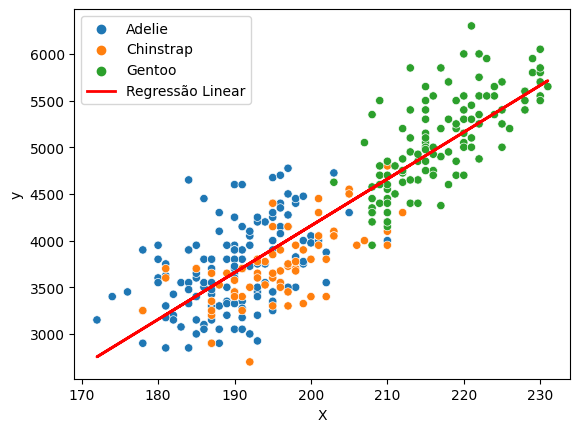

In [ ]:
# Plotar os dados e a reta de regressão
sns.scatterplot(data=df1, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

***As duas covariáveis apresentam uma forte correlação linear positiva, o que pode difícultar tarefas de classificação. Ocasionando, por exemplo, informações redudantes ou causar overfitting. ***

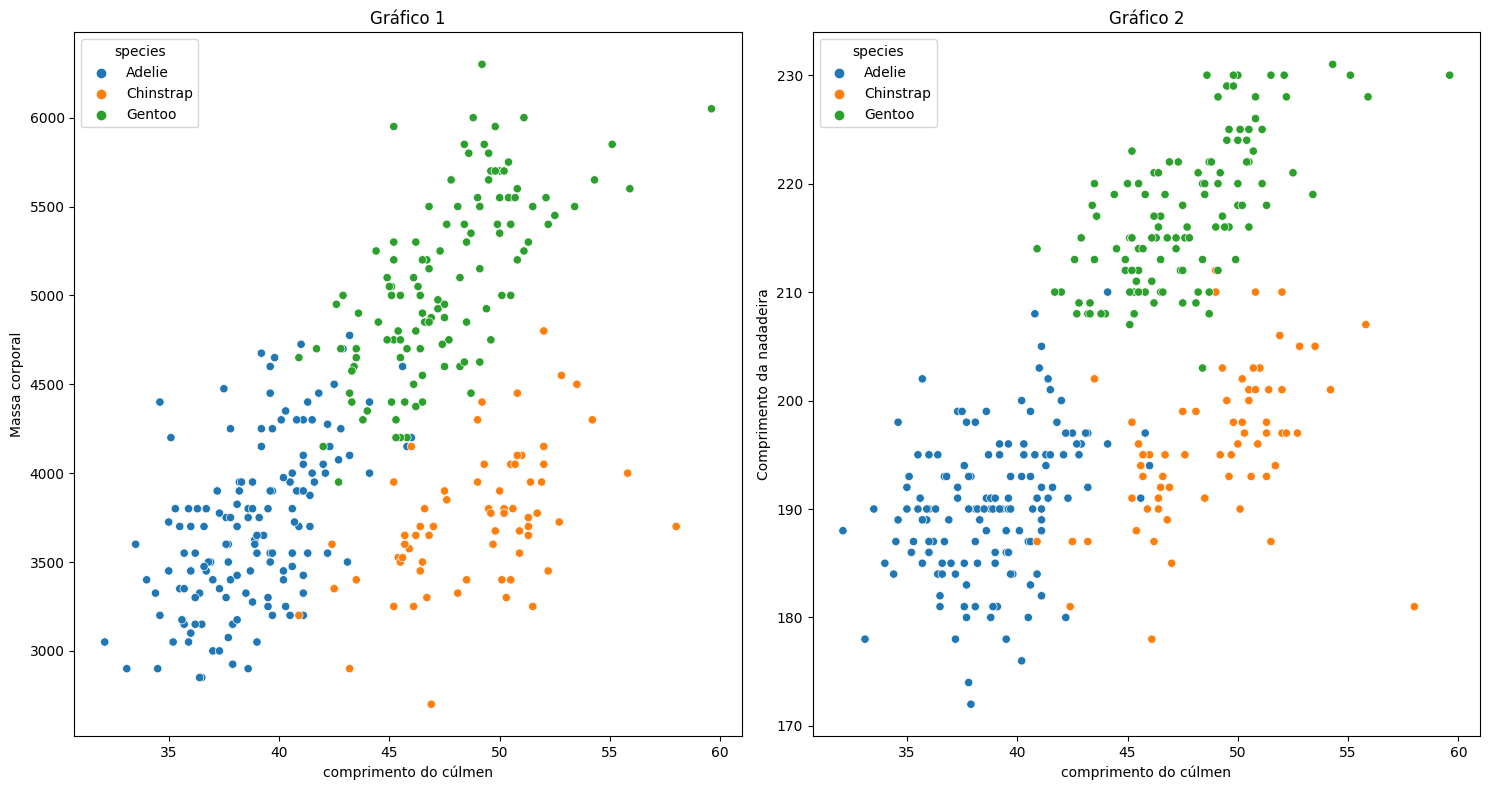

In [ ]:
# Criar uma figura e dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data=df1, x="culmen_length_mm", y="body_mass_g", hue="species", ax=ax1)
ax1.set_title('Gráfico 1')
ax1.set_xlabel('comprimento do cúlmen')
ax1.set_ylabel('Massa corporal')

sns.scatterplot(data=df1, x="culmen_length_mm", y="flipper_length_mm", hue="species", ax=ax2)
ax2.set_title('Gráfico 2')
ax2.set_xlabel('comprimento do cúlmen')
ax2.set_ylabel('Comprimento da nadadeira')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos resultantes
plt.show()


Neste gráfico de dispersão também é possivel observar pouca sobreposição.

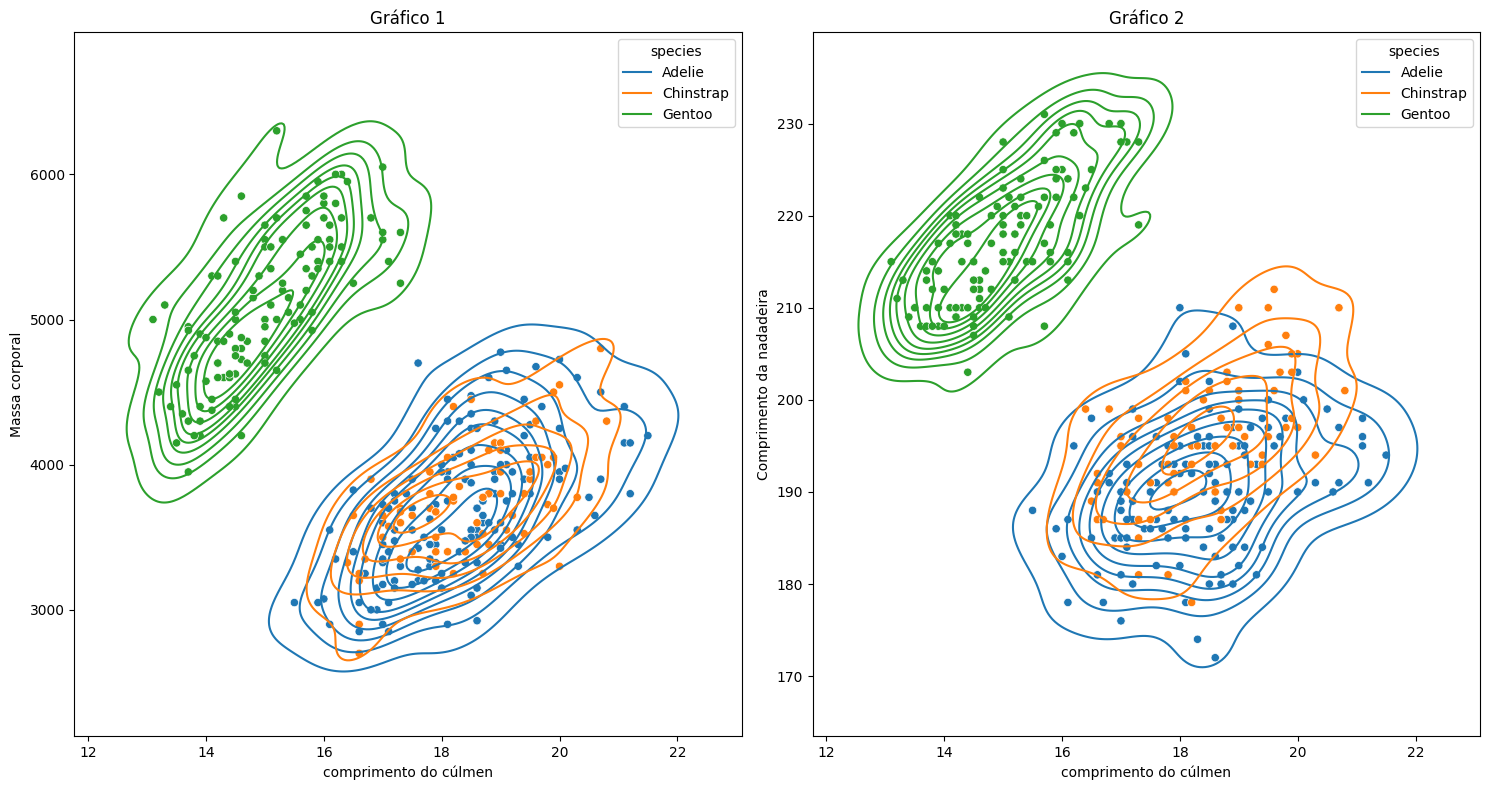

In [ ]:
# Criar uma figura e dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data=df1, x="culmen_depth_mm", y="body_mass_g", hue="species", ax=ax1)
sns.kdeplot(data=df1, x="culmen_depth_mm", y="body_mass_g", hue="species", ax=ax1)
ax1.set_title('Gráfico 1')
ax1.set_xlabel('comprimento do cúlmen')
ax1.set_ylabel('Massa corporal')

sns.scatterplot(data=df1, x="culmen_depth_mm", y="flipper_length_mm", hue="species", ax=ax2)
sns.kdeplot(data=df1, x="culmen_depth_mm", y="flipper_length_mm", hue="species")
ax2.set_title('Gráfico 2')
ax2.set_xlabel('comprimento do cúlmen')
ax2.set_ylabel('Comprimento da nadadeira')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos resultantes
plt.show()


# **Em todos os gráficos com a variável "tamanho do culmén" foi possivel observar uma boa separação das 3 espécies de pinguin. Além disso, também podemos verificar que as duas covariáveis "massa corporal" e "tamanho da nadadeira" podem separar adequadamente a espécie "Gentoo" das demais**

In [ ]:
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1,species1,IMC
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1,0.114465
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,1,0.109839
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,1,0.085470
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,1,0.092620
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1,0.101108


<Axes: xlabel='IMC', ylabel='Density'>

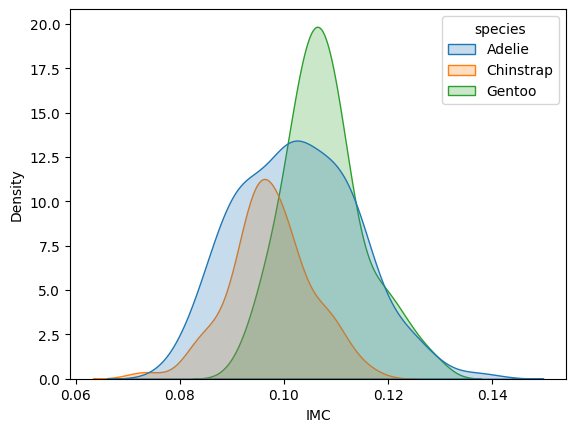

In [ ]:
sns.kdeplot(data=df1, x="IMC", hue="species", fill=True)

# ***Variáveis Categoricas***

<Axes: ylabel='island'>

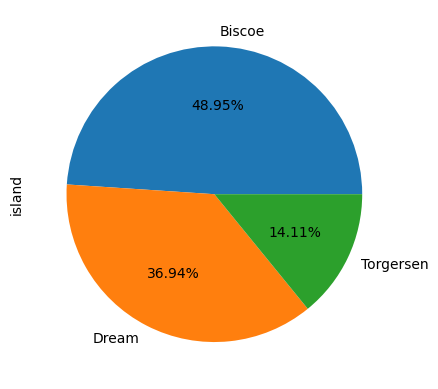

In [ ]:
df1["island"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='species'>

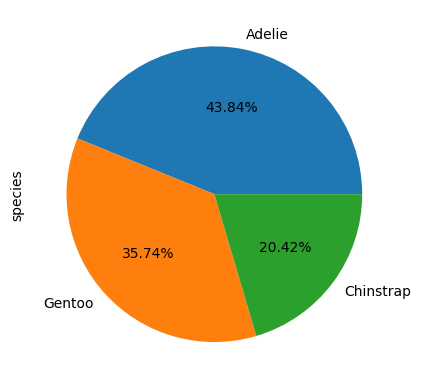

In [ ]:
df1["species"].value_counts().plot(kind="pie", autopct="%.2f%%")


<Axes: ylabel='sex'>

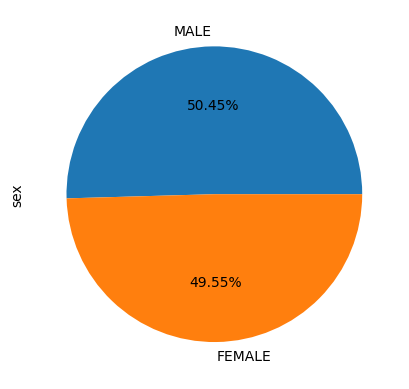

In [ ]:
df1["sex"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [ ]:
# Tabela de contingência Sexo X species
tabela_contingencia = pd.crosstab(df1['island'], df1['species'])
tabela_contingencia

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [ ]:
d = df1.drop(['species1', 'sex1'], axis=1, inplace=False)
corre = d.corr()
corre

<ipython-input-102-1a57f7e82697>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = d.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,IMC
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451,0.199123
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.057972
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.237395
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.676646
IMC,0.199123,-0.057972,0.237395,0.676646,1.000000


<Axes: >

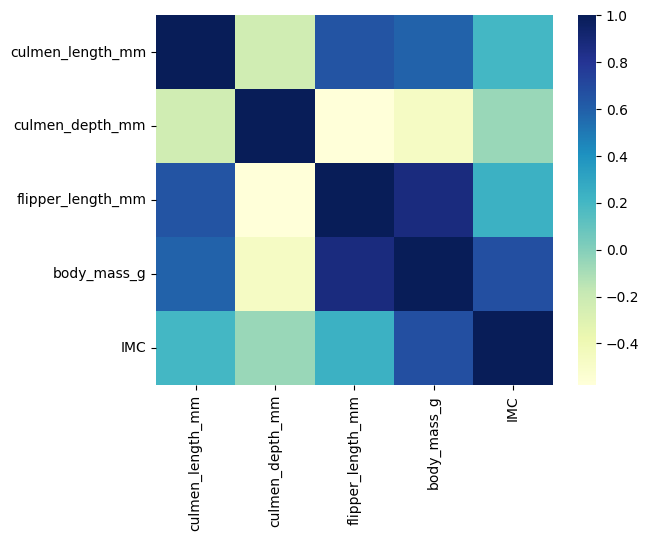

In [ ]:
sns.heatmap(corre,xticklabels = corre.columns,yticklabels = corre.columns,cmap='YlGnBu')

**Somente a espécie Adelie está presente nas 3 ilhas**

In [ ]:
df1["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [ ]:
df1["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df1["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

# ***Construindo Modelos ML***

In [ ]:
df1 = df1.drop(['species', 'island','sex'], axis=1, inplace=False)

In [ ]:
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex1,species1,IMC
0,39.1,18.7,181.0,3750.0,0,1,0.114465
1,39.5,17.4,186.0,3800.0,1,1,0.109839
2,40.3,18.0,195.0,3250.0,1,1,0.085470
4,36.7,19.3,193.0,3450.0,1,1,0.092620
5,39.3,20.6,190.0,3650.0,0,1,0.101108


In [ ]:
# Separar as features (variáveis independentes) e o target (variável dependente)
x = df1.drop("species1", axis = 1)
y = df1["species1"]


In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
# Exibir os tamanhos dos conjuntos de treino e teste
print('Tamanho do conjunto de treino:', len(X_train))
print('Tamanho do conjunto de teste:', len(X_test))
print('Tamanho do conjunto de treino:', len(y_train))
print('Tamanho do conjunto de teste:', len(y_test))

Tamanho do conjunto de treino: 223
Tamanho do conjunto de teste: 110
Tamanho do conjunto de treino: 223
Tamanho do conjunto de teste: 110


# ***Stochastic Gradient Descent (SGD):***

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

# ***Random Forest***

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# ***Logistic Regression***

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ***K Nearest Neighbor***

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# ***Gaussian Naive Bayes***

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# ***Perceptron***

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# ***Linear Support Vector Machine***

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# ***Decision Tree***

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
99.55,Logistic Regression
96.86,Naive Bayes
90.58,KNN
45.29,Support Vector Machines
36.32,Perceptron
21.52,Stochastic Gradient Decent


# **Exportando o banco de dados**

In [ ]:
df1.to_csv("/content/drive/MyDrive/Colab Notebooks/df1.csv", index=False)

In [ ]:
#!dir para listar os arquivos da pasta
!dir
#!ls no linux